In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas
from phe import *
from phe import map_data as phe_map_data
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

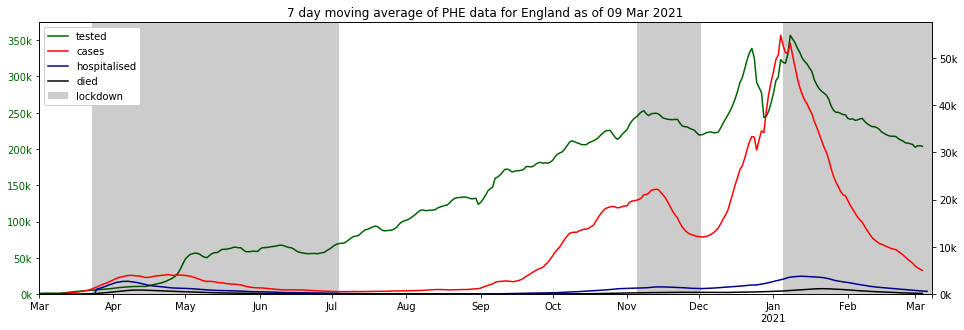

In [2]:
plot_summary(left_series=(s.unique_people_tested_sum,),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

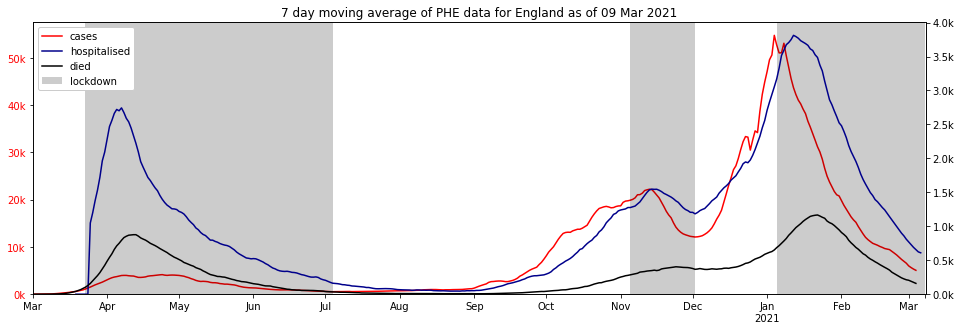

In [3]:
plot_summary(left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,821121.0,19199233.0,18378112.0,56286961,1.458812,32.650745,65.890443
1,Northern Ireland,N92000002,44594.0,596527.0,551933.0,1893667,2.354902,29.146254,68.498844
2,Scotland,S92000003,123686.0,1789377.0,1665691.0,5463300,2.263943,30.488734,67.247323
3,Wales,W92000004,192030.0,1007391.0,815361.0,3152879,6.090624,25.860840,68.048536


'partial: 22,592,528 (33.8%), full: 1,181,431'

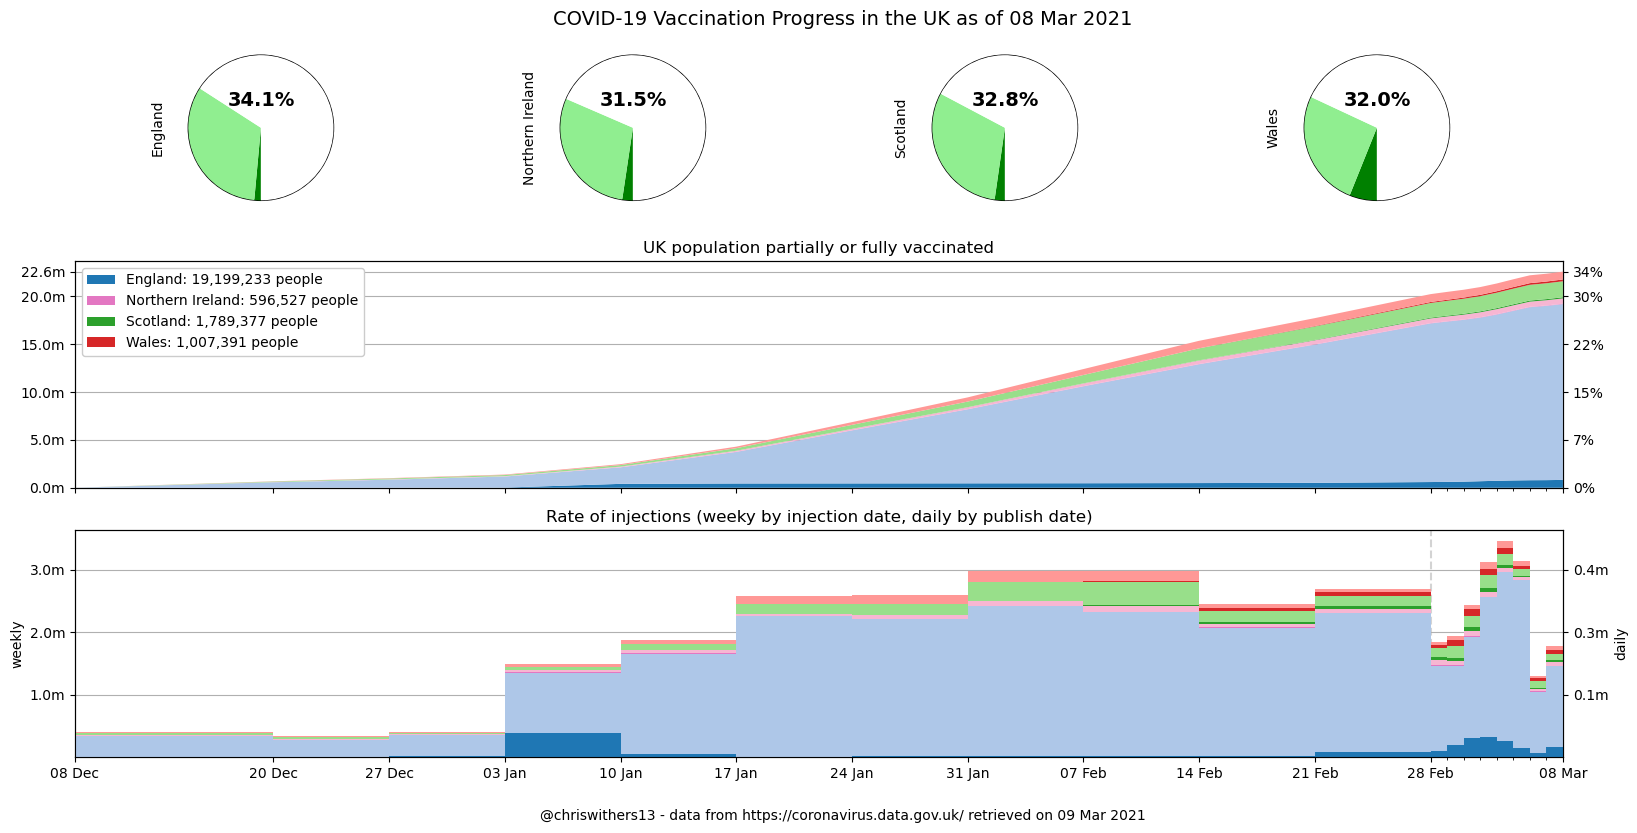

In [4]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

In [5]:
vaccination_changes()

,,First Dose (New),Second Dose (New),Complete (New),First Dose (Total),Second Dose (Total),Complete (Total)
,,,,,,,
England,08 Mar 21,"+183,736","+23,800","+23,800","+19,199,233","+821,121","+821,121"
Northern Ireland,08 Mar 21,"+7,724","+1,743","+1,743","+596,527","+44,594","+44,594"
Scotland,08 Mar 21,"+14,718","+4,954","+4,954","+1,789,377","+123,686","+123,686"
Wales,08 Mar 21,"+9,095","+8,291","+8,291","+1,007,391","+192,030","+192,030"


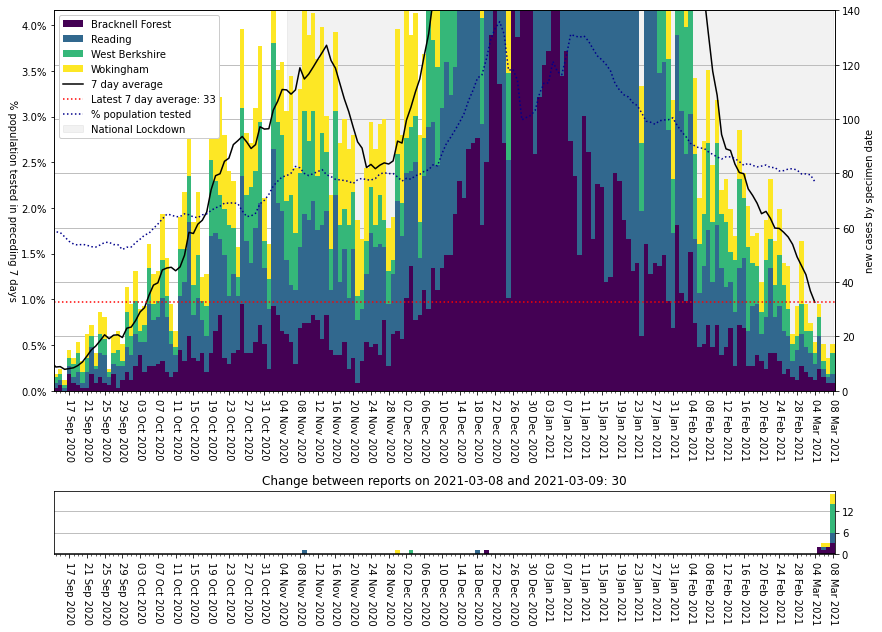

In [6]:
plot_areas(for_date, areas=my_areas, earliest='2020-09-14', ylim=140)

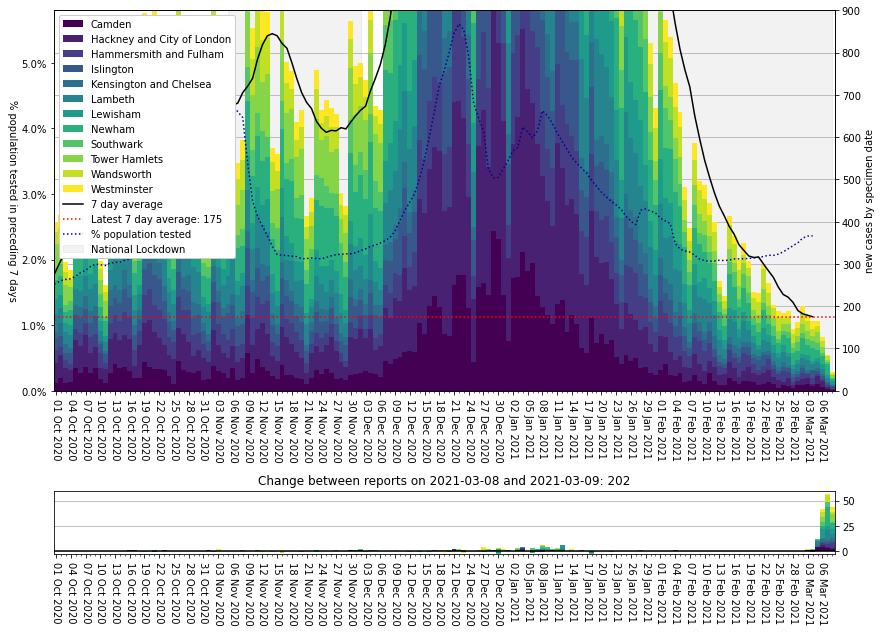

In [7]:
plot_areas(for_date, areas=london_areas, ylim=900)

In [8]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [9]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000035,Derbyshire Dales,176.978915,128.0,2021-03-08
E06000010,"Kingston upon Hull, City of",134.345480,349.0,2021-03-08
E07000123,Preston,132.043176,189.0,2021-03-08
E07000150,Corby,131.546152,95.0,2021-03-08
E07000236,Redditch,127.842742,109.0,2021-03-08
E08000018,Rotherham,127.349658,338.0,2021-03-08
E08000032,Bradford,122.458205,661.0,2021-03-08
E08000016,Barnsley,120.308183,297.0,2021-03-08
E07000171,Bassetlaw,119.190526,140.0,2021-03-08


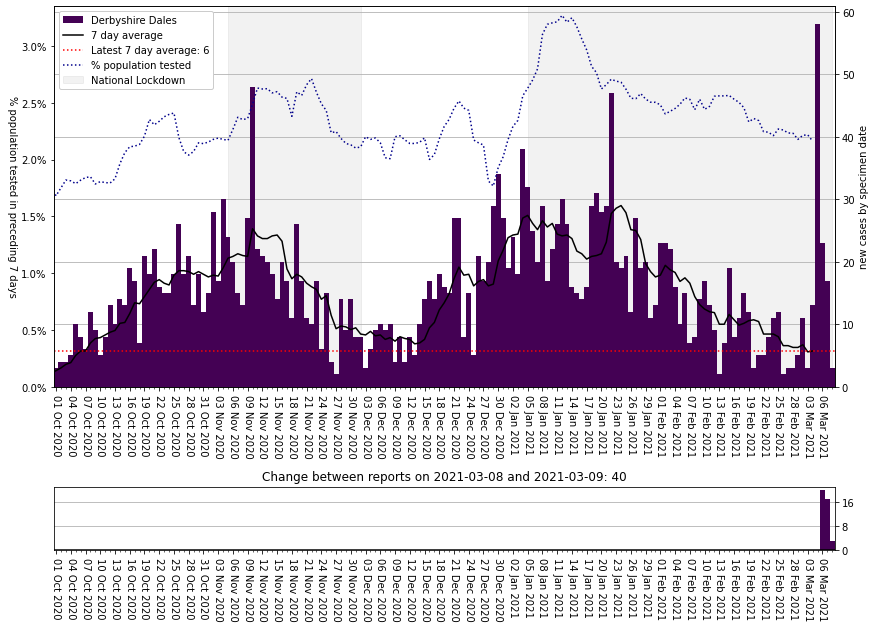

In [10]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [11]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,71.815424,820.0,2021-03-08
E08000032,Bradford,122.458205,661.0,2021-03-08
S12000049,Glasgow City,101.876422,645.0,2021-03-08
E08000035,Leeds,80.692035,640.0,2021-03-08
E08000019,Sheffield,69.761119,408.0,2021-03-08
E08000003,Manchester,70.542526,390.0,2021-03-08
E06000016,Leicester,110.099824,390.0,2021-03-08
E08000036,Wakefield,111.394382,388.0,2021-03-08
E08000034,Kirklees,84.586402,372.0,2021-03-08


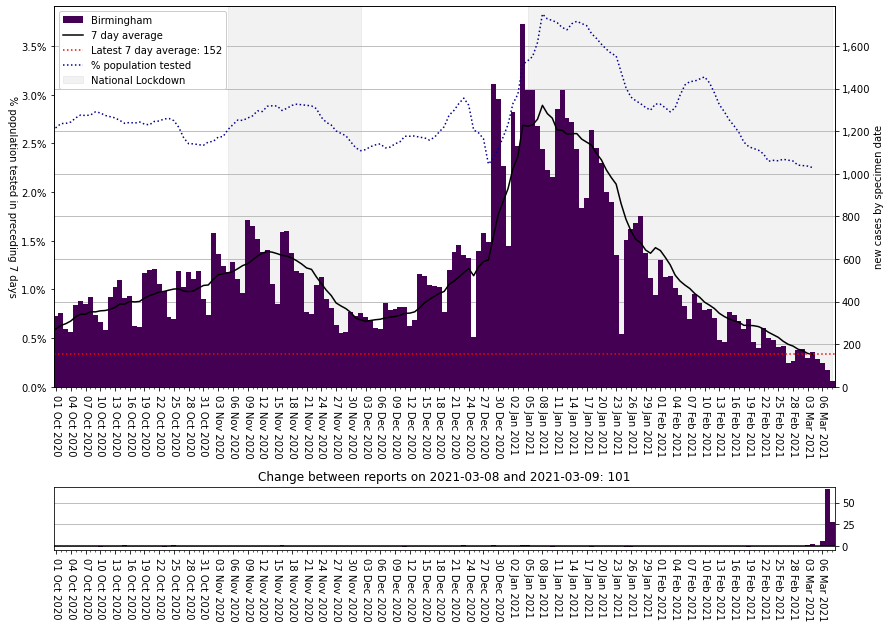

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [13]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 2.8
phe_max = 0.25

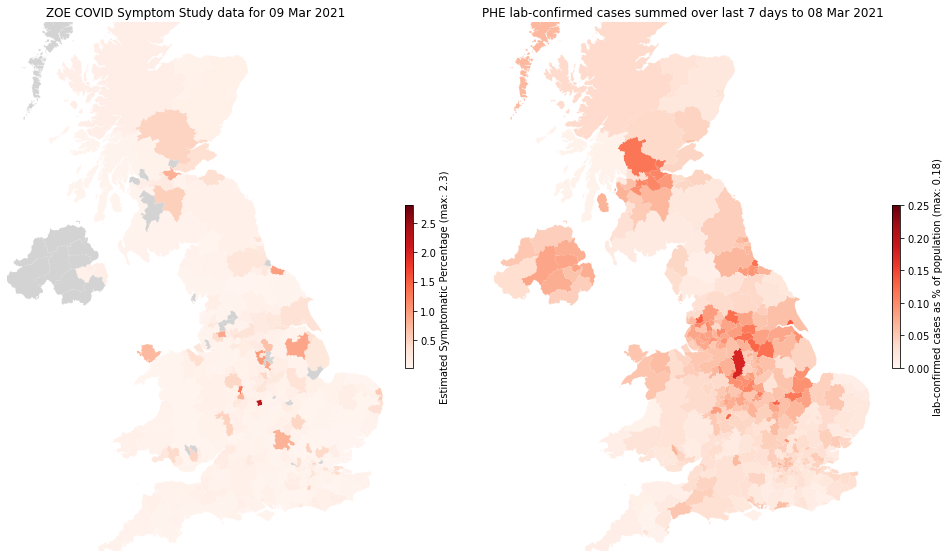

In [14]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [15]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...

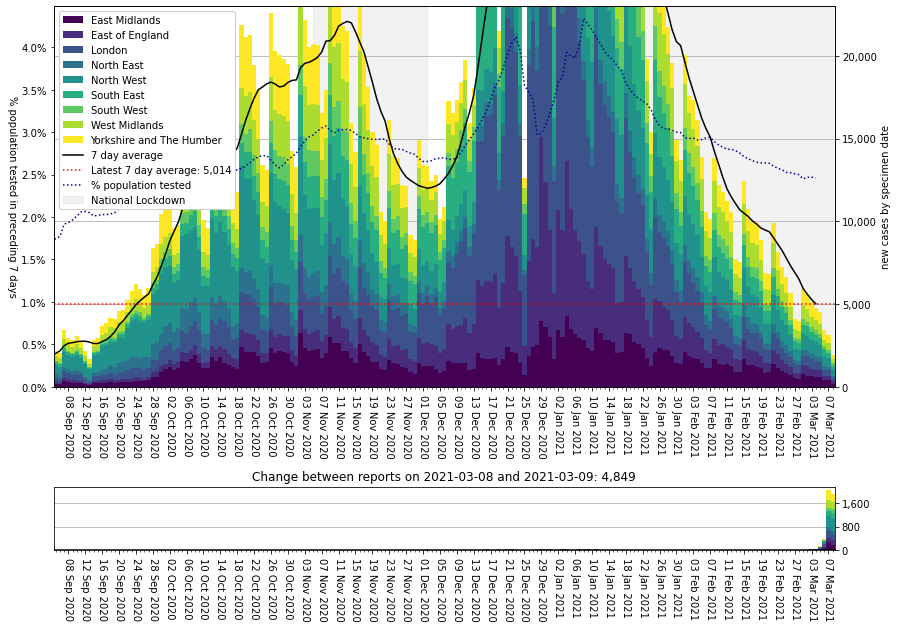

In [16]:
plot_areas(for_date, area_type=region, ylim=23_000, earliest='2020-09-05')

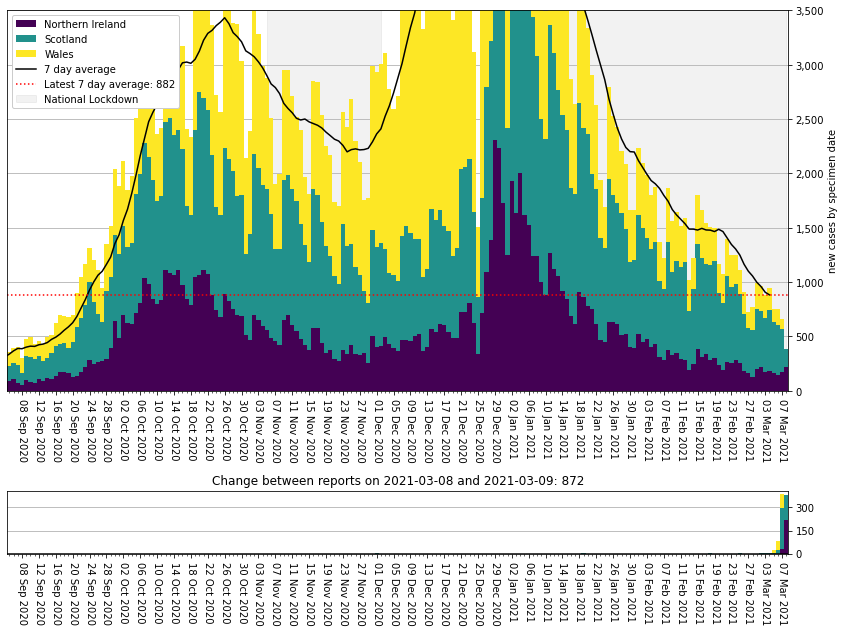

In [17]:
plot_areas(for_date, 'cases_devolved', ylim=3_500, diff_ylims=None, earliest='2020-09-05')